<a href="https://colab.research.google.com/github/Sar98/1D_heat_eqn/blob/main/1D_heat_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The pythonization of a MATLAB script
## Solution of a 1D heat equation using foward, backward, and central difference approximations.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# variables
L = 3       # rod length (3 in this case so that the final plot is symmetric and shows the oscillations from the initial conditions)
T = .3      # total time (s)
k = .5      # thermal diffusivity constant  
N = 24      # number of spatial steps
M = 50      # number of time steps
dx = L/N    # delta x  
dt = T/M    # delta t
alpha = k*dt/dx**2

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0669624  0.12078854 ... 0.01991492 0.         0.        ]
 [0.         0.06957649 0.12553793 ... 0.02164171 0.         0.        ]
 ...
 [0.         0.34969667 0.64269318 ... 0.61970966 0.         0.        ]
 [0.         0.36063853 0.66428819 ... 0.73229179 0.         0.        ]
 [0.         0.38268343 0.70710678 ... 0.92387953 0.70710678 0.        ]]


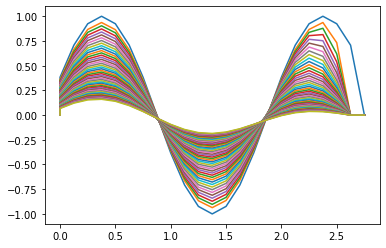

In [37]:
# Full set of positions

x = np.zeros(N)
t = np.zeros(M)

for i in range(N-1):
  x[i] = i*dx
for j in range(M-1):
  t[j] = j*dt

# Initial condition
u_0 = np.zeros(N)

for i in range(N-1):
  u_0[i] = np.sin(np.pi*x[i])

# Heat equation in terms of approximations with boundary conditions
u_1 = np.zeros(N)
u = np.zeros((M,N))

for j in range(M-1):
  for i in range(1, N-2):   # leaving out the boundaries
    u_1[i] = u_0[i] + alpha*(u_0[i+1] - 2*u_0[i] + u_0[i-1])

  u_1[0] = 0            # Dirchelet Condition
  u_1[N-1] = u_0[N-1]   # Neuman Condition
  #print(u_1[N-1])

  u[M-j-1,:] = u_0
  plt.plot(sorted(x),(u[M-j-1,:]))
  u_0 = u_1   # update u_0 and loop back

print(u)  # sanity check


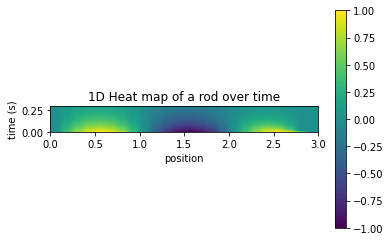

In [38]:
plt.imshow(u, extent=[0,L,0,T])
plt.colorbar()
plt.xlabel('position')
plt.ylabel('time (s)')
plt.title('1D Heat map of a rod over time')
plt.show()